## KNMI rain data 
Also Koninklijk Nederlands Meteorologisch Instituut or Royal Dutch Meteorological Institute is a Dutch national weather service. The main task of KNMI is to forecast weather and to monitor the weather, climate, air quality and seismic activity (related to earthquakes). With the knowledge they have, they try to reduce risks in the field of weather, climate and seismology and try to limit damage and injuries.

KNMI receives the data from the measure stations and weather stations throughout the country. They share the data, to give advice to others. In extreme cases, such as storms, it is important to stay up to date so people will stay safe. For example, they work together with ProRail, a company that is responsible for the maintenance, renewal, expansion and safety of the Dutch railway network. In case severe weather is predicted, they will decide to change timetable for trains.

### Data Requirements

We want to know the rain measurements from a recent period of time. We can check multiple data sources, however since KNMI is the most trusted data source, we will for now look at this data source only. <br>

We expect to have a datapoint for each day, we don't want to have any missing values. <br>
As we want to check how much it rained on days within the period 01-01-2018 until 27-05-2022, we would need features such as precipitation and date. Besides that we do not really need any other features.

### Data Collection

We are going to look at the rain measurements from January 1st 2018 until May 27th 2022. We want to find out if the rain has an affect on the traffic jams and roadworks. The data we are looking at is from <a href="https://daggegevens.knmi.nl/">KNMI</a>. For now we will only look at the weather station in Eindhoven. Since we look at the rain we chose RHX and RHXH. <br>

We will also look into the traffic jams which we used earlier in the project and see if there is a relationship between the counted traffic jams and rain measurements. The details from this dataset can be found in a seperate document, where we dig deeper into traffic jams.

### Data Understanding

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
rain = pd.read_excel("Rain measurements.xlsx", skiprows = 9)
rain

,# STN,YYYYMMDD,RHX,RHXH
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


We chose only Eindhoven. The number of the weather station is 370. We skipped the first 9 rows, since these rows are not useful as they are just explaining what each column stands for and some other comments. 

In [181]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   # STN     1608 non-null   int64
 1   YYYYMMDD  1608 non-null   int64
 2     RHX     1608 non-null   int64
 3    RHXH     1608 non-null   int64
dtypes: int64(4)
memory usage: 50.4 KB


The names of the columns have spaces in front, so this needs to be fixed for sure. But since the names are not really understandable, we will also change the names. There are no missing values.

In [182]:
rain ['# STN'].unique()

array([370], dtype=int64)

As predicted the only value is 370, since we only look at the weather station in Eindhoven. We will change this to categorical because then the only value could be 370 or null, when a new row is added.

In [183]:
rain[rain['YYYYMMDD'].duplicated() == True]

,# STN,YYYYMMDD,RHX,RHXH


We want to know if the date column has any duplicate values, when checking there are no duplicate values. This means there is no date duplicate in the dataframe and since there are no missing values, we know that the dates range from 01-01-2018 until 27-05-2022.

In [184]:
rain['  RHX'].unique()

array([ 21,  10,  37,   5,   4,   0,  -1,   9,  28,  24,  20,  22,   6,
        12,  33,   3,  16, 105,  17,   8,   2,  13,  14,  18,  11,  26,
        15,   1, 101,  46,  72,  53, 141,  74,  57,  39,  34,  29,  54,
         7,  58,  35,  85,  30,  38,  36,  23,  25,  89,  65, 120, 124,
        77,  27,  31,  48,  69,  19,  56,  59, 102,  40,  61, 126, 178,
        52,  97,  32,  43,  42, 167,  55,  45,  88,  49, 136, 153, 158,
        41,  50,  51,  83], dtype=int64)

In [185]:
rain[' RHXH'].unique()

array([16,  5,  4, 15, 14,  1,  8, 21, 10, 23, 13, 22,  3, 18, 11, 12, 19,
       20,  6, 17,  2,  7, 24,  9], dtype=int64)

These values are only hours. This could be categorical, since these values occur multiple times. There cannot be any other values than 1-24, since these are the only hours in a day.
Since we are only interested in the working times, we will replace all values of precipitation to 0, for the times after 18.00 (6 PM) and before 8.00 (8 AM). We will not remove these rows, since this might cause problems later.

There are 4 columns with in total 1608 rows. We chose the dates ourselves so we could extend the dataset even more, if we want to we can extend it. 

<b>#STN</b><br>
Stands for the weather station number. This should be 370 for each row, since we only look at Eindhoven. <br>
Datatype is int64 - change to category<br>
1608 non-null values<br>

<b>YYYYMMDD</b><br>
The day the rain was measured.<br>
Datatype is int64 - change to datetime<br>
1608 non-null values<br>

<b>RHX</b><br>
Maximum hourly precipitation amount (in 0.1 mm). If a value in the column is -1, this means there was less than 0.05mm percipitation.<br>
Datatype is int64<br>
1608 non-null values<br>

<b>RHXH</b><br>
Hourly division in which the maximum hourly precipitation is measured.<br>
Datatype is int64<br>
1608 non-null values

In [186]:
rain.describe()

,# STN,YYYYMMDD,RHX,RHXH
count,1608.0,1.608000e+03,1608.000000,1608.000000
mean,370.0,2.019792e+07,7.703358,6.269900
std,0.0,1.281200e+04,17.348715,7.409981
min,370.0,2.018010e+07,-1.000000,1.000000
25%,370.0,2.019021e+07,0.000000,1.000000
50%,370.0,2.020031e+07,0.000000,1.000000
75%,370.0,2.021042e+07,9.000000,12.000000
max,370.0,2.022053e+07,178.000000,24.000000


At least half of the data has no rain. From 75% the max hourly precipitation is 9 or higher. There are a lot of dry days in the range of dates we chose.

In [187]:
rain[rain['  RHX'] == 178]

,# STN,YYYYMMDD,RHX,RHXH
898,370,20200617,178,17


We checked <a href="https://weerstatistieken.nl/eindhoven/2020/juni">Weerstatistieken</a> to double check if the data is the same, this is exactly true. However, they used the data from KNMI, so this is unfortunately not as useful as hoped.

In [188]:
year_2018 = rain[(rain['YYYYMMDD'] >= 20181231)]
year_2019 = rain[(rain['YYYYMMDD'] >= 20190101) & (rain['YYYYMMDD'] <= 20191231)]
year_2020 = rain[(rain['YYYYMMDD'] >= 20200101) & (rain['YYYYMMDD'] <= 20201231)]
year_2021 = rain[(rain['YYYYMMDD'] >= 20210101) & (rain['YYYYMMDD'] <= 20211231)]
year_2022 = rain[(rain['YYYYMMDD'] >= 20220101)]

We created new dataframes for each year, so that it is easier to check data per year. This way we can also check if there are similarities per year.

<AxesSubplot:xlabel='YYYYMMDD'>

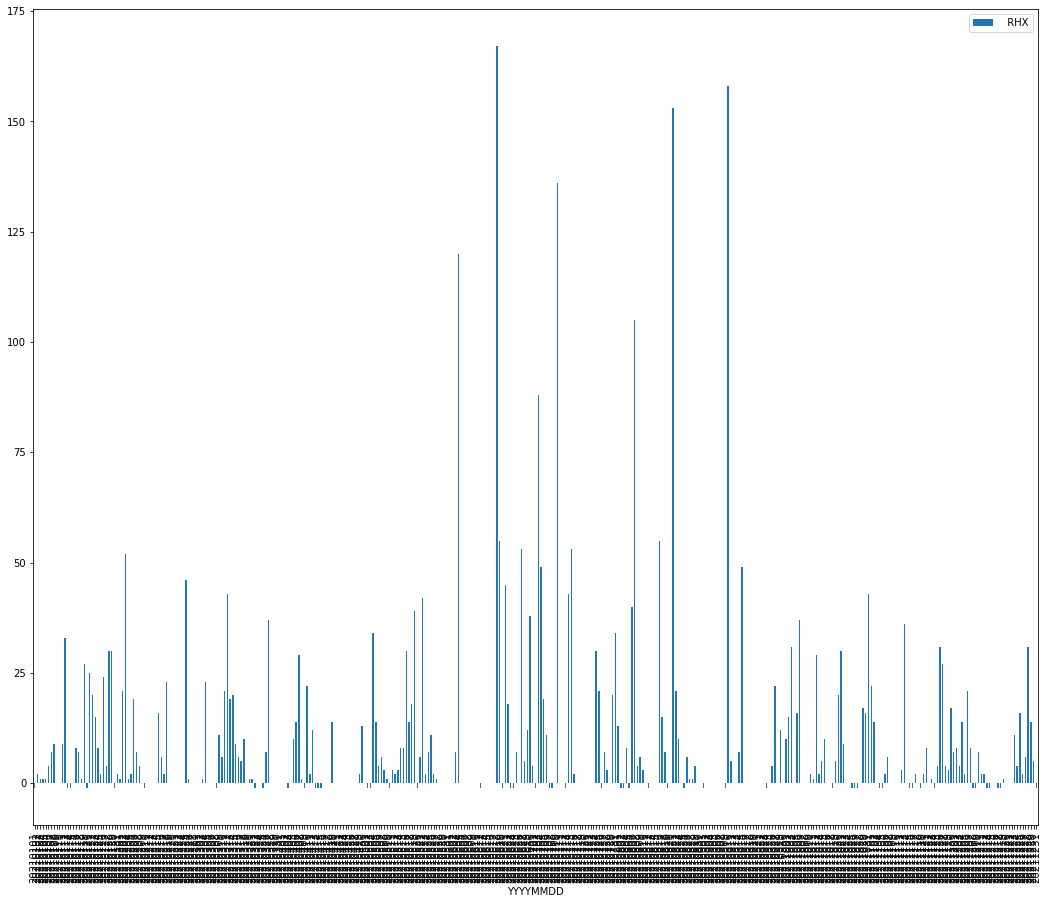

In [189]:
year_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))

Since the dataframe is filtered on each year, it is better visible. But we still cannot see the dates, so we filter again into periods of 4 months. It is best to check the data from 2021, since that is where we have the most data with Traffic Jams.<br> We checked what the barplot looked like when we rotated the plot. However, since there is so much data it still looks too crowded. When we look at one year, divided into periods of 4 months, we will look at the barplot horizontally and add a grid, so the bar plot is more readable.

In [190]:
jan_apr_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210101) & (year_2021['YYYYMMDD'] <= 20210430)]
may_aug_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210501) & (year_2021['YYYYMMDD'] <= 20210831)]
sep_dec_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210901) & (year_2021['YYYYMMDD'] <= 20211231)]

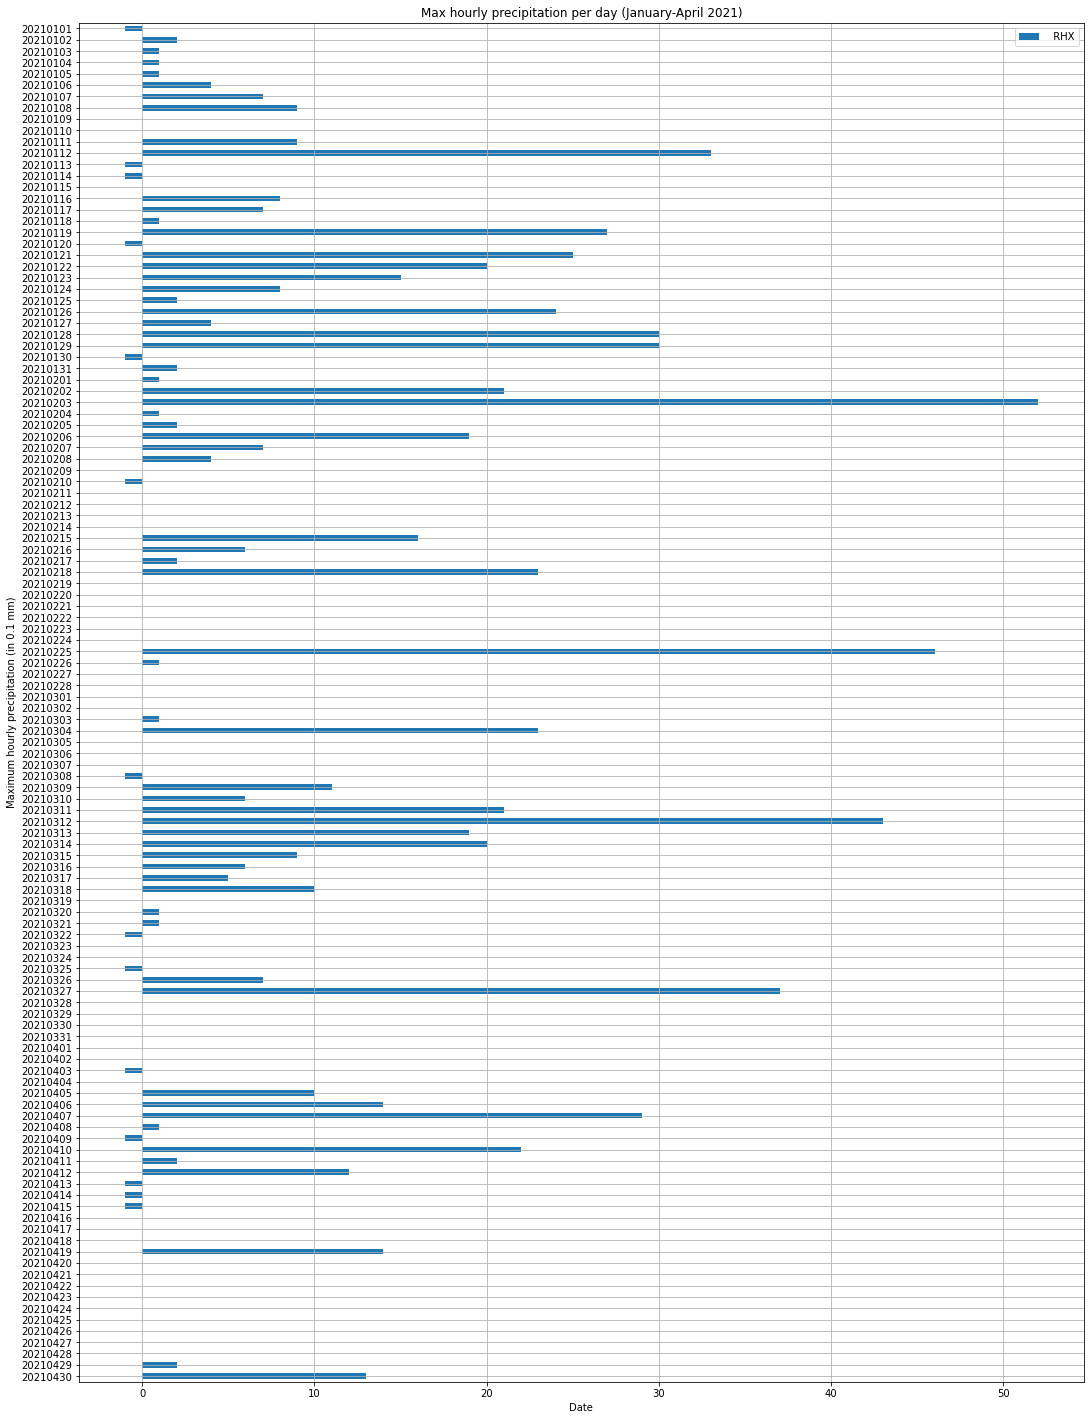

In [191]:
jan_apr_2021.plot.barh(x='YYYYMMDD', y='  RHX', grid = True, figsize=(18,25))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')
plt.title('Max hourly precipitation per day (January-April 2021)')
plt.ylim(reversed(plt.ylim()))
plt.show()

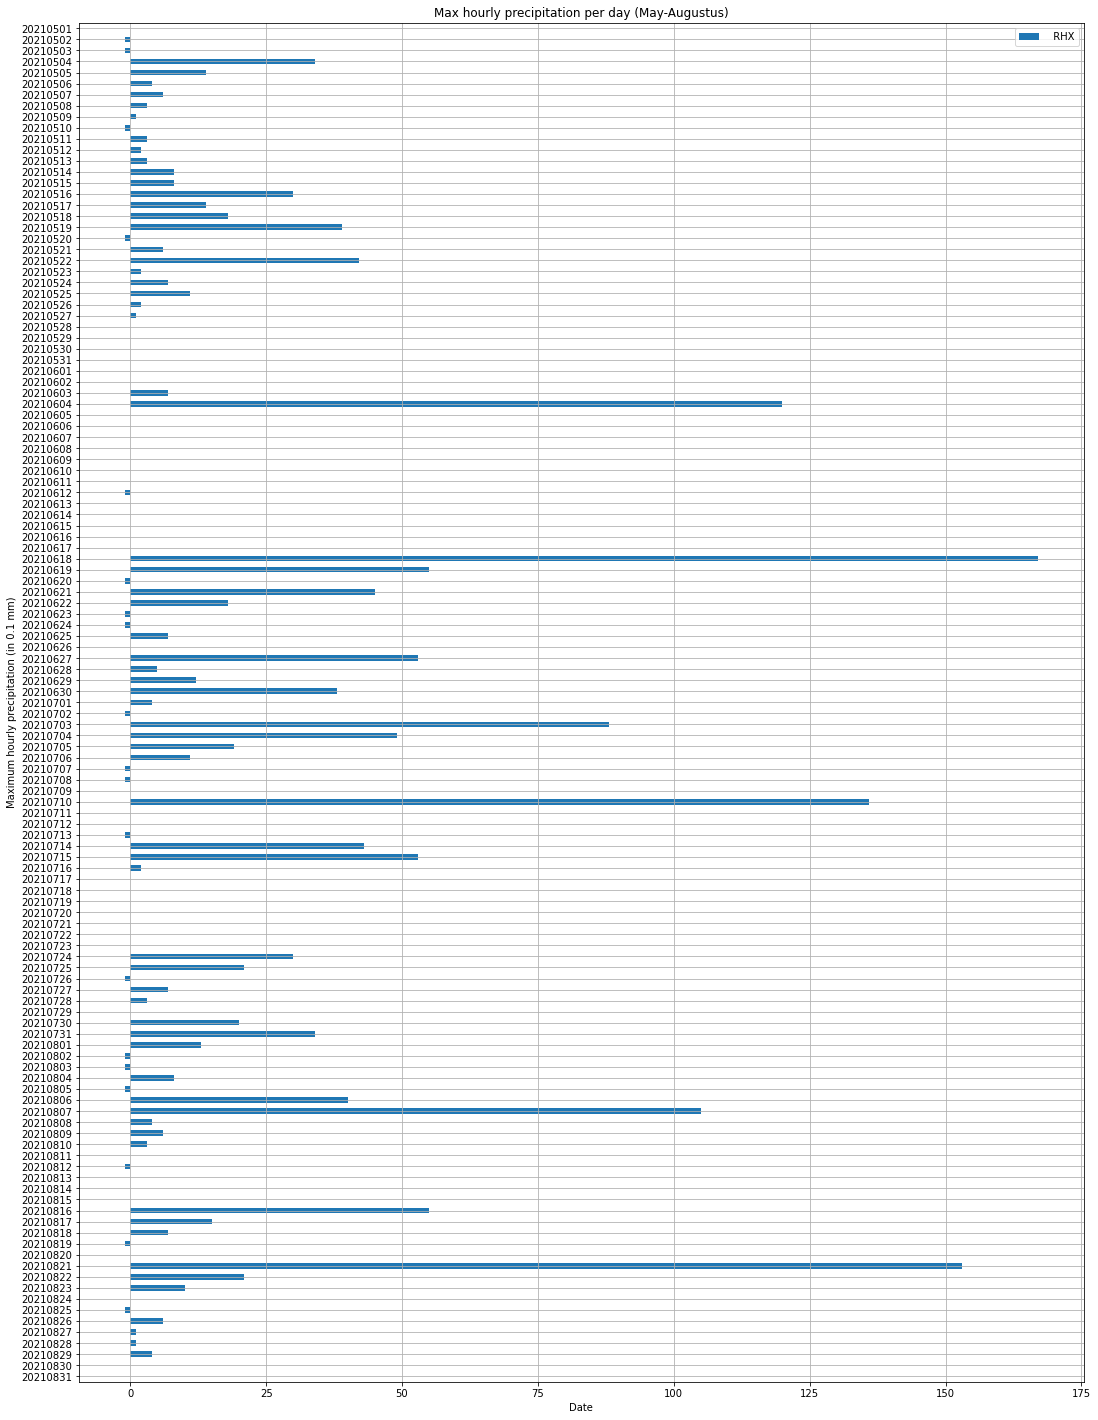

In [192]:
may_aug_2021.plot.barh(x='YYYYMMDD', y='  RHX', grid = True, figsize=(18,25))
plt.xlabel('Date')
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.title('Max hourly precipitation per day (May-Augustus)')
plt.ylim(reversed(plt.ylim()))
plt.show()

Text(0.5, 1.0, 'Max hourly precipitation per day (September-December)')

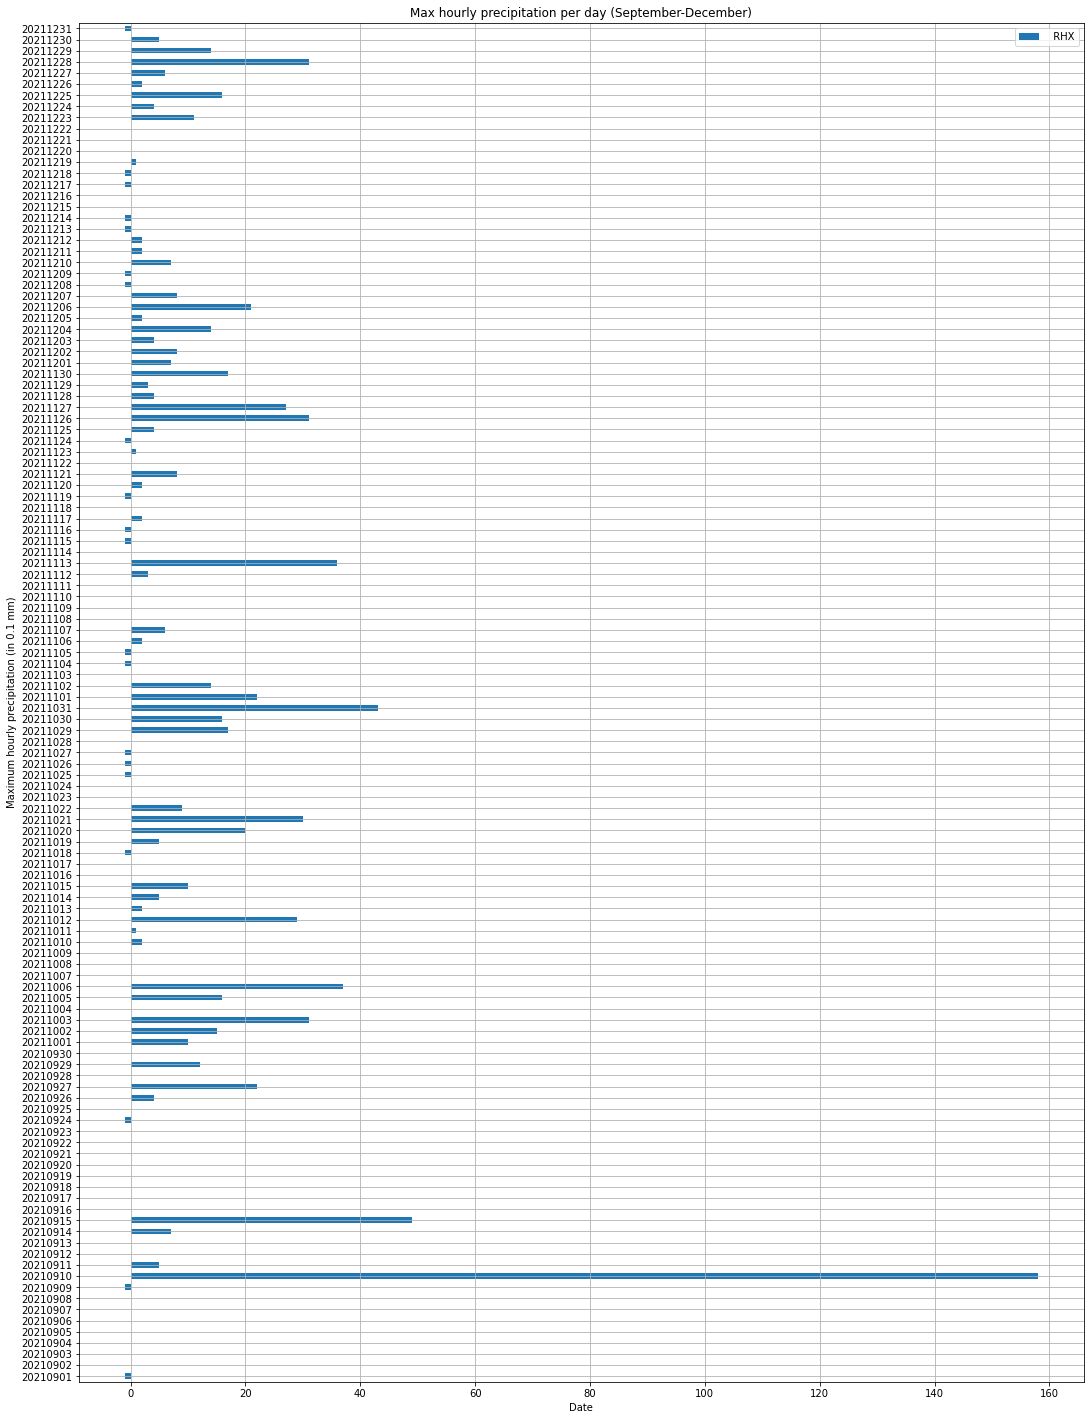

In [193]:
sep_dec_2021.plot.barh(x='YYYYMMDD', y='  RHX', grid = True, figsize=(18,25))
plt.xlabel('Date')
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.title('Max hourly precipitation per day (September-December)')

# Add comment

In [194]:
rain[' RHXH'].value_counts()

1     909
17     45
14     39
3      36
13     35
24     35
16     34
12     33
5      31
18     31
21     31
22     30
2      30
7      30
11     28
10     28
15     28
9      28
19     27
23     26
4      26
8      24
6      23
20     21
Name:  RHXH, dtype: int64

We will later on change the RHX values to 0 from the column RHXH from 19.00 (7.00 PM) until 7.00 (7 AM), so the value counts for a lot of values will change. 

### Data Preparation

Since the RHX is counted in 0.1mm, we multiply it by 10 to get value to 1 mm<br>
The column names might be confusing, so we change the names so they are more understandable.

In [195]:
rain = rain.rename(columns={"# STN": "Weatherstation", "YYYYMMDD": "Date", "  RHX": "Max hourly precipitation", " RHXH": "Hour of max precipitation"})
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


In [196]:
#rain = rain.astype({"Weatherstation" : "category", "Hour of max precipitation" : "category"})
rain['Date'] = rain['Date'].apply([lambda x: pd.to_datetime(f"{x}"[:4] + "-" + f"{x}"[4:6] + "-" + f"{x}"[6:], format='%Y-%m-%d')])
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Weatherstation             1608 non-null   int64         
 1   Date                       1608 non-null   datetime64[ns]
 2   Max hourly precipitation   1608 non-null   int64         
 3   Hour of max precipitation  1608 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 50.4 KB


We tried to convert the columns 'Weatherstation'and 'Hour of max precipitation' to category, however this is not possible. We got an error later on, because we cannot put categorical data on the x-axis, since it needs to be numerical values.

In [197]:
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,21,16
1,370,2018-01-02,10,5
2,370,2018-01-03,37,4
3,370,2018-01-04,5,15
4,370,2018-01-05,10,4
...,...,...,...,...
1603,370,2022-05-23,83,17
1604,370,2022-05-24,31,13
1605,370,2022-05-25,-1,1
1606,370,2022-05-26,0,1


The date has a datatype of datetime now. The format is also changed, so it is more readable.

In [198]:
rain['Max hourly precipitation'] = 10 * rain['Max hourly precipitation']
rain['Max hourly precipitation'] = rain['Max hourly precipitation'].replace(-10, 0)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
3,370,2018-01-04,50,15
4,370,2018-01-05,100,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


We want to have the Max hourly precipitation in 1 mm instead of 0.1 mm, so we multiply this column by 10. The values -1 are replaced with 0, since we cannot have negative values because these values are closer to 0 than to -1. -1 means less than 0.05 mm. If we would still have -1 values in our dataset, this could be understood as rain rising instead of rain falling. 

In [199]:
rain['Max hourly precipitation'].unique()

array([ 210,  100,  370,   50,   40,    0,   90,  280,  240,  200,  220,
         60,  120,  330,   30,  160, 1050,  170,   80,   20,  130,  140,
        180,  110,  260,  150,   10, 1010,  460,  720,  530, 1410,  740,
        570,  390,  340,  290,  540,   70,  580,  350,  850,  300,  380,
        360,  230,  250,  890,  650, 1200, 1240,  770,  270,  310,  480,
        690,  190,  560,  590, 1020,  400,  610, 1260, 1780,  520,  970,
        320,  430,  420, 1670,  550,  450,  880,  490, 1360, 1530, 1580,
        410,  500,  510,  830], dtype=int64)

Check if really all -10 is removed. There are no more -10 values in the 'Max hourly precipitation' column, so all these values are changed to 0.

In [200]:
non_working_hours = rain[(rain['Hour of max precipitation'] > 18) | (rain['Hour of max precipitation'] < 8)]
non_working_hours

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
4,370,2018-01-05,100,4
6,370,2018-01-07,0,1
7,370,2018-01-08,0,1
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


Most of the max hourly precipitation has fallen outside of the working hours. We have 1255 rows for non-working hours, so only 353 rows are with hours within working hours.

In [201]:
non_working_hours['Hour of max precipitation'].unique()

array([ 5,  4,  1, 21, 23, 22,  3, 19, 20,  6,  2,  7, 24], dtype=int64)

In [202]:
non_working_hours['Max hourly precipitation'] = 0

In [203]:
working_hours = rain[(rain['Hour of max precipitation'] <= 18) & (rain['Hour of max precipitation'] >= 8)]
working_hours

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1596,370,2022-05-16,230,11
1599,370,2022-05-19,420,12
1600,370,2022-05-20,150,13
1603,370,2022-05-23,830,17


We create a new dataset. If we look at only the working hours, we can see there are only 353 rows. So most of the precipitation happened before and after working hours.

In [204]:
frames = [working_hours, non_working_hours]

baserain = rain.copy()
baserain = baserain.set_index(baserain['Date'], drop = False)
baserain.index = pd.DatetimeIndex(baserain.index).to_period('D')

rain = pd.concat(frames)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


In [205]:
rain.sort_index(inplace = True)

We want to sort the index. When joining the two dataframes together, the dates are not sorted on date anymore. So we sort the index.

In [206]:
pd.date_range(start = '2018-01-01', end = '2022-05-27').difference(rain.index)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21',
               '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27'],
              dtype='datetime64[ns]', length=1608, freq='D')

We now check if there is any missing dates, this is not the case, we do not have any missing dates. 

In [207]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Weatherstation             1608 non-null   int64         
 1   Date                       1608 non-null   datetime64[ns]
 2   Max hourly precipitation   1608 non-null   int64         
 3   Hour of max precipitation  1608 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 62.8 KB


We change the datetime to period, because when modeling this this works better. When modeling SARIMA, it is not possible to use a datetime, which is why we convert this to period. Now we will look at if the period is set.

# Combining rain with Traffic Jams

In [208]:
traffic_jams = pd.read_csv('TrafficJams.csv')
traffic_jams

,date,month_yr,year,date.1,count
0,2020-07-13,2020-07,2020,2020-07-13,145
1,2020-07-14,2020-07,2020,2020-07-14,396
2,2020-07-15,2020-07,2020,2020-07-15,303
3,2020-07-16,2020-07,2020,2020-07-16,356
4,2020-07-17,2020-07,2020,2020-07-17,722
...,...,...,...,...,...
496,2022-02-19,2022-02,2022,2022-02-19,471
497,2022-02-20,2022-02,2022,2022-02-20,191
498,2022-02-21,2022-02,2022,2022-02-21,1270
499,2022-02-22,2022-02,2022,2022-02-22,1977


We now import the Traffic Jams so we can check if there is a relationship between the amount of traffic jams and the rain. 

In [209]:
traffic_jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      501 non-null    object
 1   month_yr  501 non-null    object
 2   year      501 non-null    int64 
 3   date.1    501 non-null    object
 4   count     501 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [210]:
traffic_jams['date'].equals(traffic_jams['date.1'])

True

We do not have any missing values. Date and date.1 have the exact same values, so we will drop one of these.

In [211]:
traffic_jams = traffic_jams.drop(['month_yr', 'year', 'date.1'], axis = 1)
traffic_jams

,date,count
0,2020-07-13,145
1,2020-07-14,396
2,2020-07-15,303
3,2020-07-16,356
4,2020-07-17,722
...,...,...
496,2022-02-19,471
497,2022-02-20,191
498,2022-02-21,1270
499,2022-02-22,1977


A new dataset is created with only two columns. This is better, since we do not need all columns. 

In [212]:
traffic_jams = traffic_jams.rename(columns={"date" : "Date", "count" : "Traffic jams"})
traffic_jams

,Date,Traffic jams
0,2020-07-13,145
1,2020-07-14,396
2,2020-07-15,303
3,2020-07-16,356
4,2020-07-17,722
...,...,...
496,2022-02-19,471
497,2022-02-20,191
498,2022-02-21,1270
499,2022-02-22,1977


Since we will only look at the date and the amount of traffic jams, we can drop the other columns. Now we only have date and count. We need to make sure that the dataset of rain measurements have the same amount of rows, so we will take away the dates before 13-7-2020 and after 23-02-2022. 

In [213]:
rain_copy = rain.reset_index(drop = True)
rain_copy

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,0,5
2,370,2018-01-03,0,4
3,370,2018-01-04,50,15
4,370,2018-01-05,0,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


We reset the index, sorted with the most recent at the bottom. So the dates are ascending.

In [214]:
rain_copy['Date'] = rain_copy['Date'].astype('str')
rain_copy

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,0,5
2,370,2018-01-03,0,4
3,370,2018-01-04,50,15
4,370,2018-01-05,0,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


We need to change the datatype of the date column (Rain dataset), because the datatypes of the date columns of both datasets need to be the same. When they both have the datatype, we can merge the two datasets.

In [215]:
rain_trafficjams = pd.merge(rain_copy, traffic_jams, on='Date', how='right')
rain_trafficjams

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation,Traffic jams
0,370,2020-07-13,0,1,145
1,370,2020-07-14,40,14,396
2,370,2020-07-15,0,1,303
3,370,2020-07-16,50,11,356
4,370,2020-07-17,0,1,722
...,...,...,...,...,...
496,370,2022-02-19,0,22,471
497,370,2022-02-20,0,22,191
498,370,2022-02-21,160,11,1270
499,370,2022-02-22,120,17,1977


We have merged the two datasets on the column Date. All values before and after the dates from the rain datasets will not be used, since we join the two datasets with a right join. Joining from the right means that we take all rows from traffic jams, since we put this dataset second. And we add the values from the rain dataset.

In [216]:
rain_trafficjams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Weatherstation             501 non-null    int64 
 1   Date                       501 non-null    object
 2   Max hourly precipitation   501 non-null    int64 
 3   Hour of max precipitation  501 non-null    int64 
 4   Traffic jams               501 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 23.5+ KB


Now that the datasets are merged, we can again convert the datatype of Date to datetime. We do this so the date is an actual date format.

In [217]:
rain_trafficjams['Date'] = pd.to_datetime(rain_trafficjams['Date'])

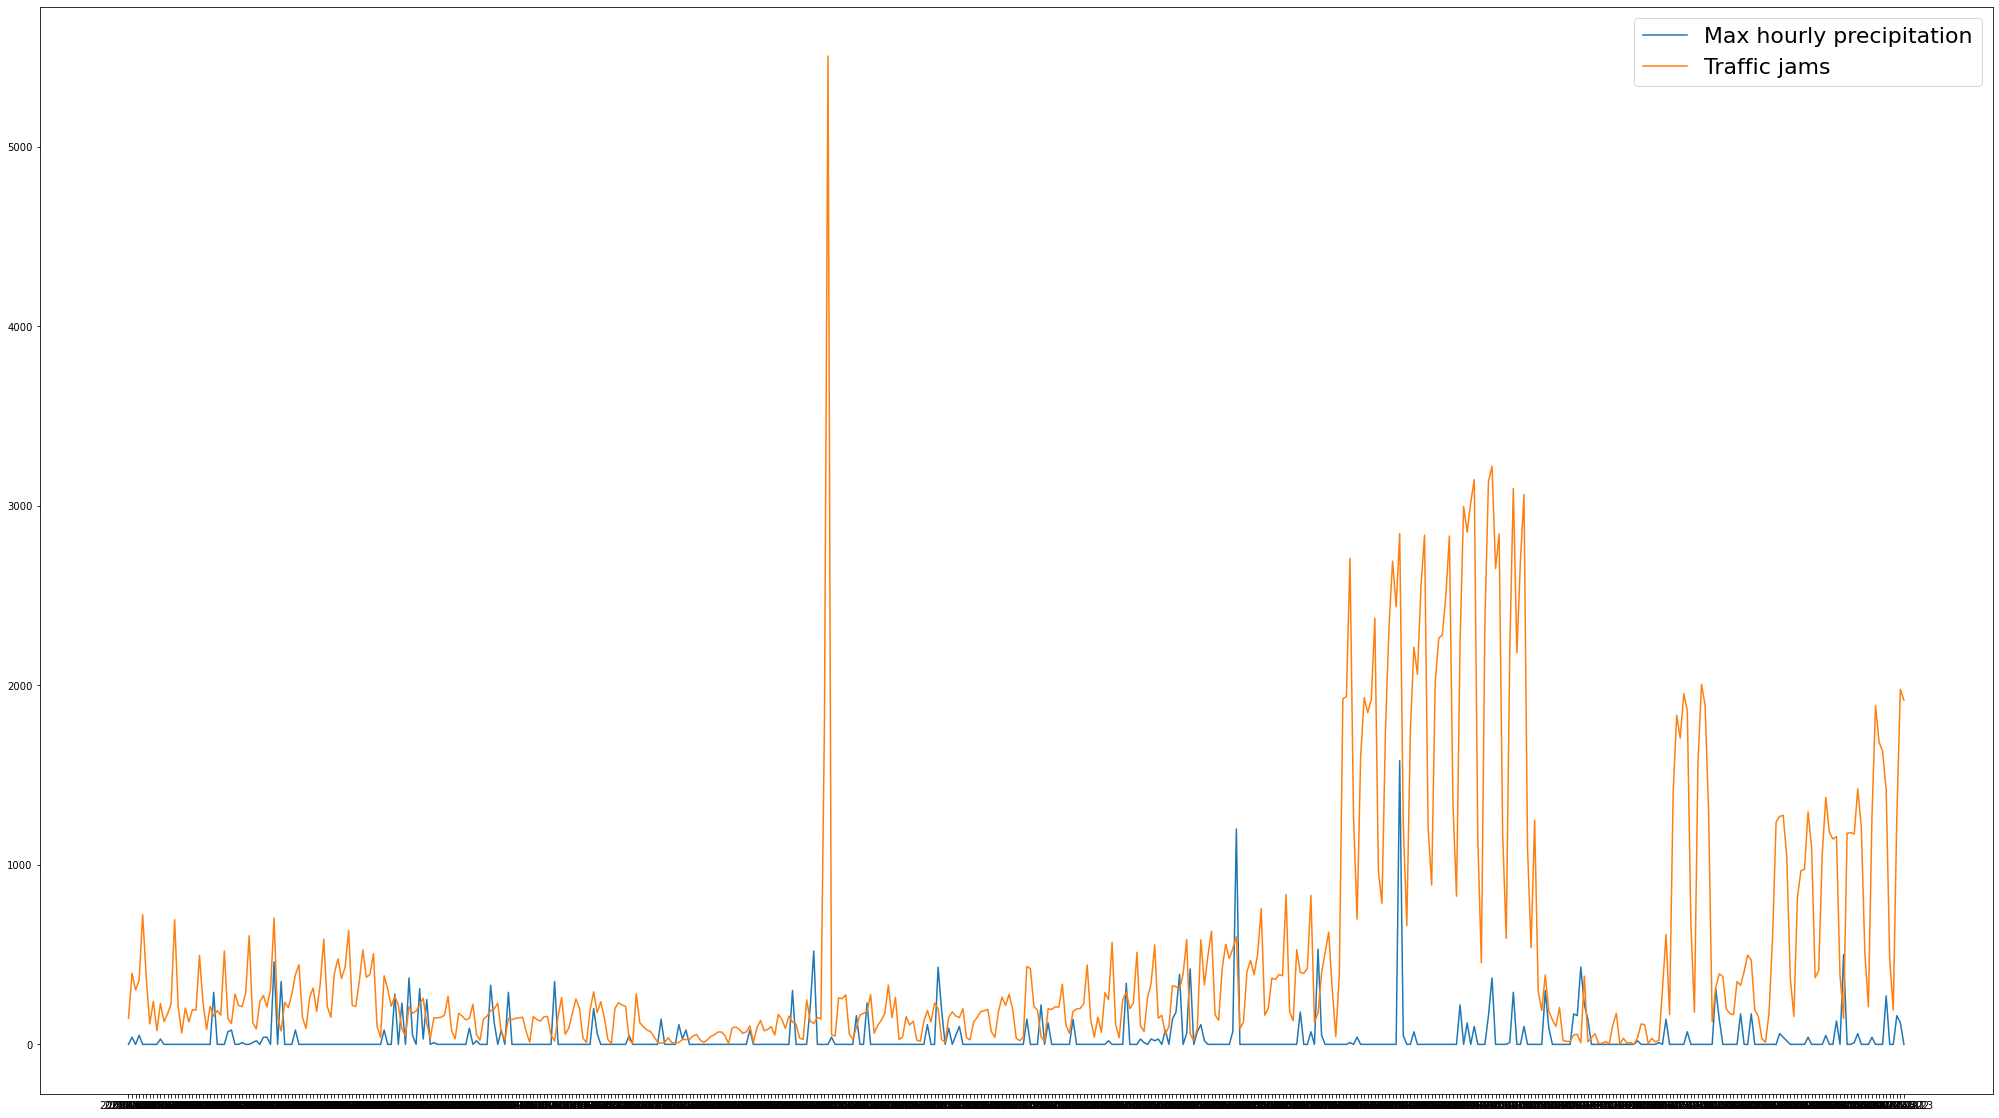

In [218]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=rain_trafficjams)
plt.plot( 'Date', 'Traffic jams', data=rain_trafficjams)
plt.legend(fontsize=22)
plt.show()

Since the date range is so big, it is impossible to see the dates. So we will split the dataset into a few periods:
<ul>
    <li>2020</li>
    <li>2021: Jan-April</li>
    <li>2021: May-August</li>
    <li>2021: September-December</li>
    <li>2022</li>
</ul>

In [41]:
year_2020 = rain_trafficjams[(rain_trafficjams['Date'] <= '2020-12-31')]
year_2021_jan_apr = rain_trafficjams[(rain_trafficjams['Date'] >= '2021-01-01') & (rain_trafficjams['Date'] <= '2021-04-30')]
year_2021_may_aug = rain_trafficjams[(rain_trafficjams['Date'] >= '2021-05-01') & (rain_trafficjams['Date'] <= '2021-08-31')]
year_2021_sep_dec = rain_trafficjams[(rain_trafficjams['Date'] >= '2021-09-01') & (rain_trafficjams['Date'] <= '2021-12-31')]
year_2022 = rain_trafficjams[(rain_trafficjams['Date'] >= '2022-01-01') & (rain_trafficjams['Date'] <= '2022-12-31')]

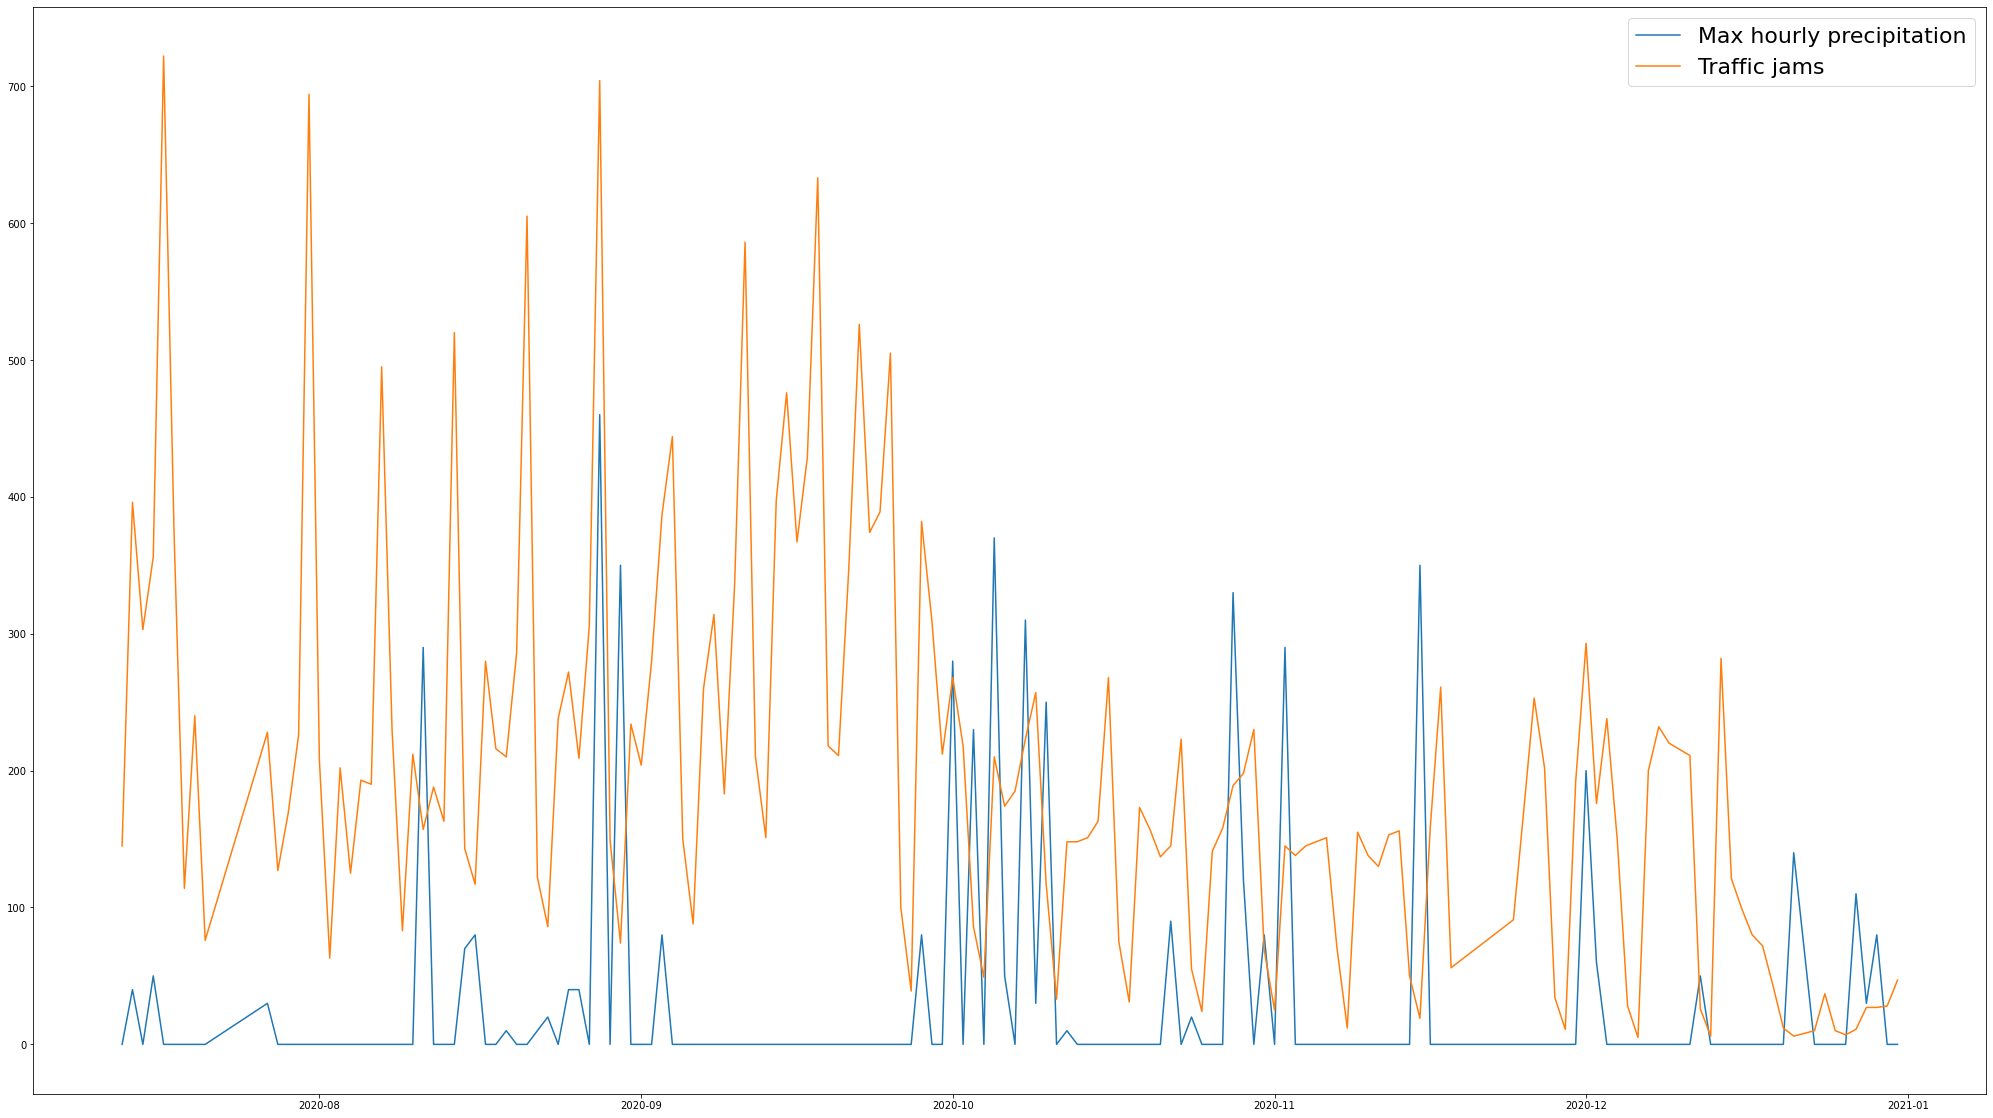

In [42]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=year_2020)
plt.plot( 'Date', 'Traffic jams', data=year_2020)
plt.legend(fontsize=22)
plt.show()

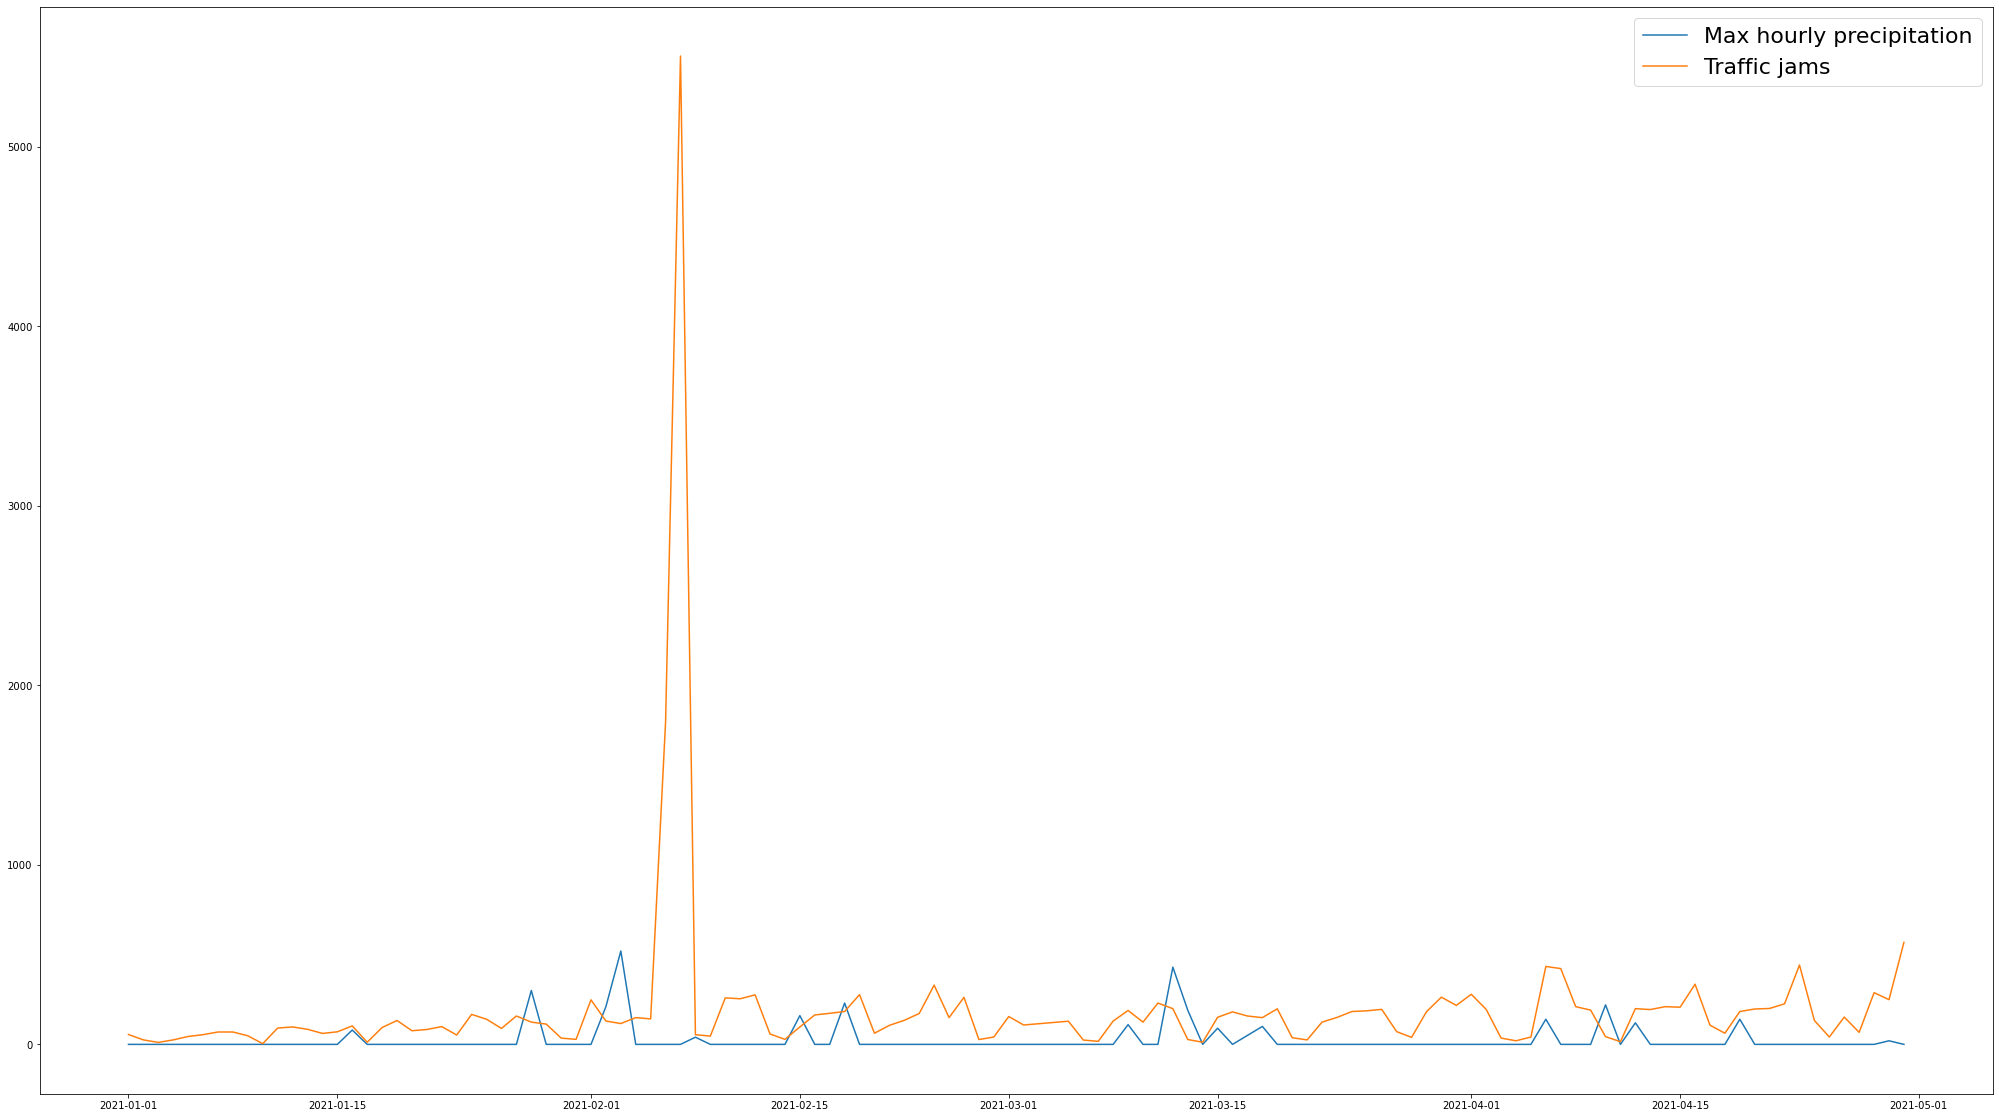

In [43]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=year_2021_jan_apr)
plt.plot( 'Date', 'Traffic jams', data=year_2021_jan_apr)
plt.legend(fontsize=22)
plt.show()

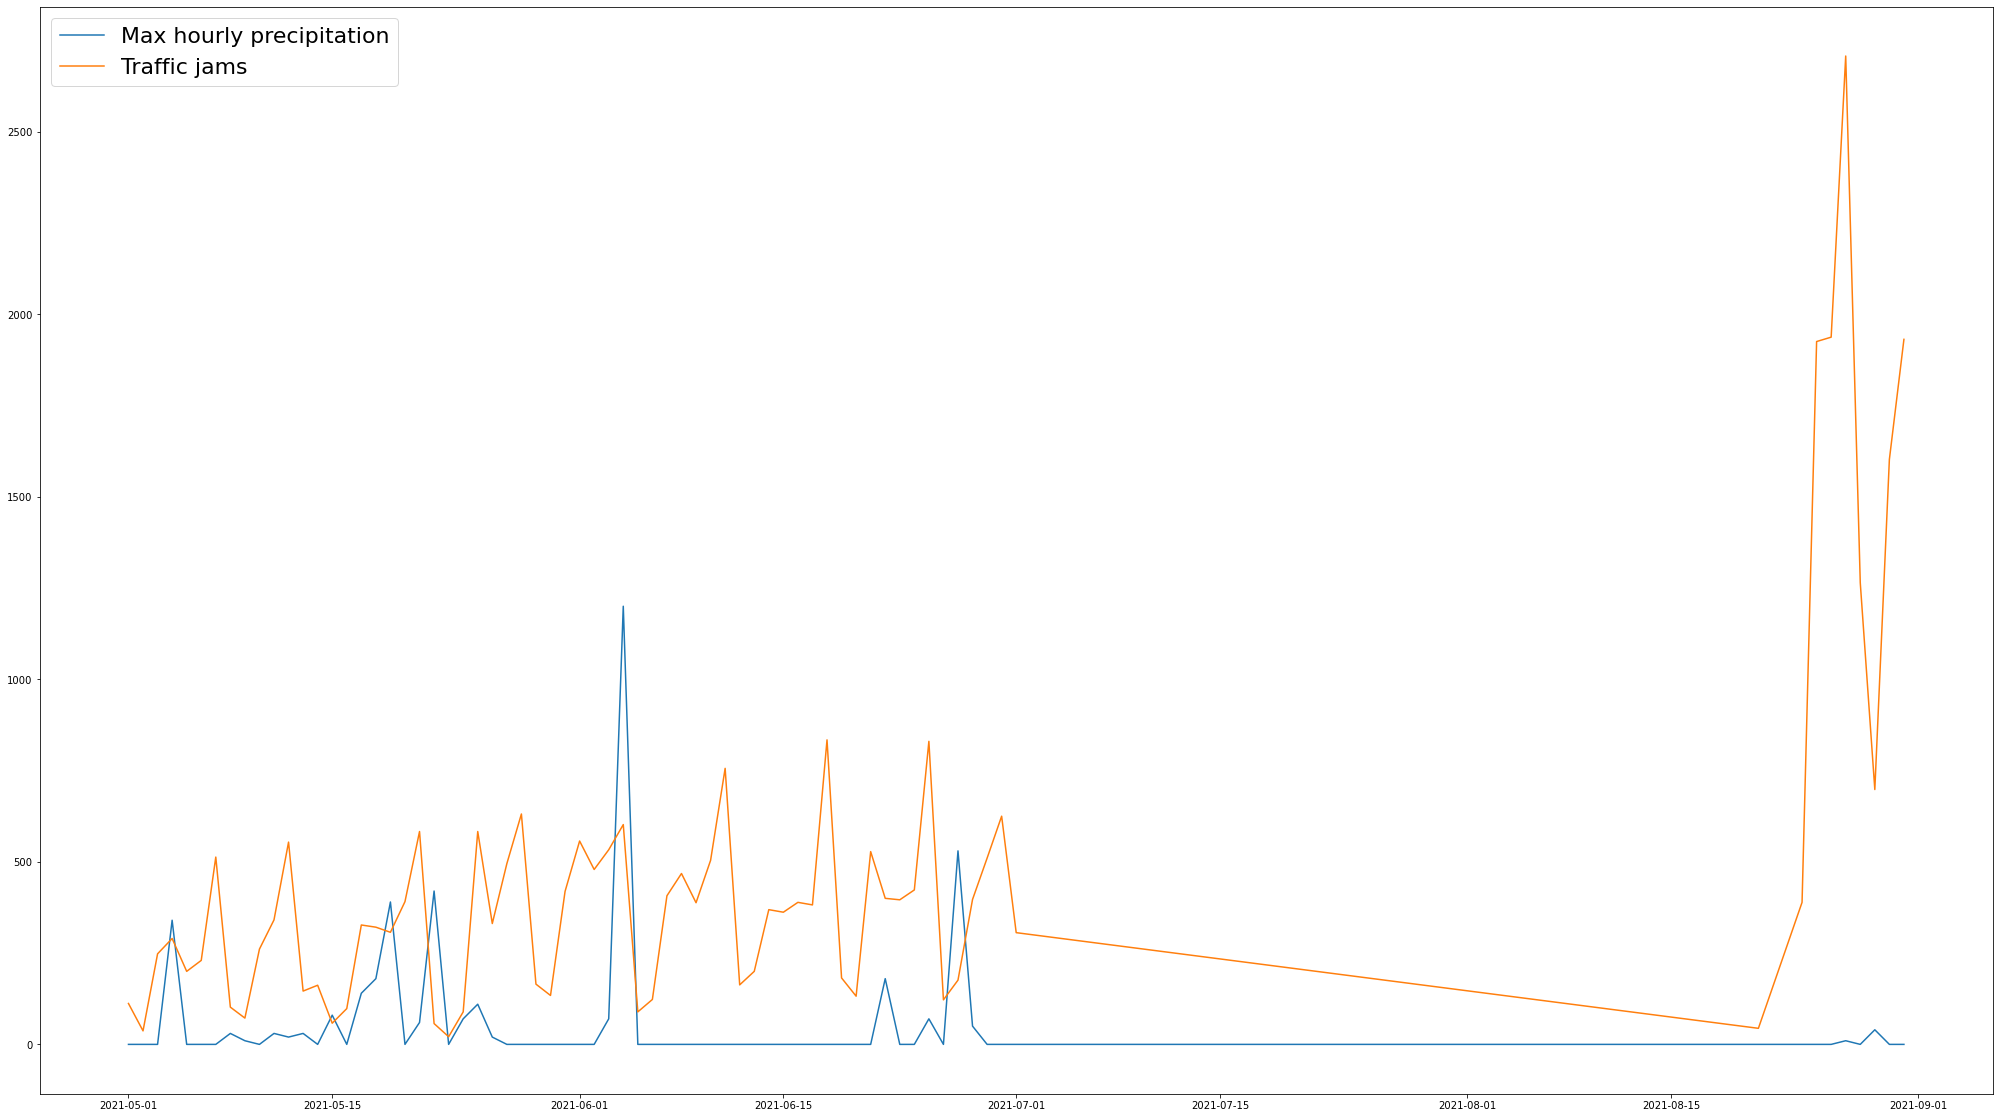

In [44]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=year_2021_may_aug)
plt.plot( 'Date', 'Traffic jams', data=year_2021_may_aug)
plt.legend(fontsize=22)
plt.show()

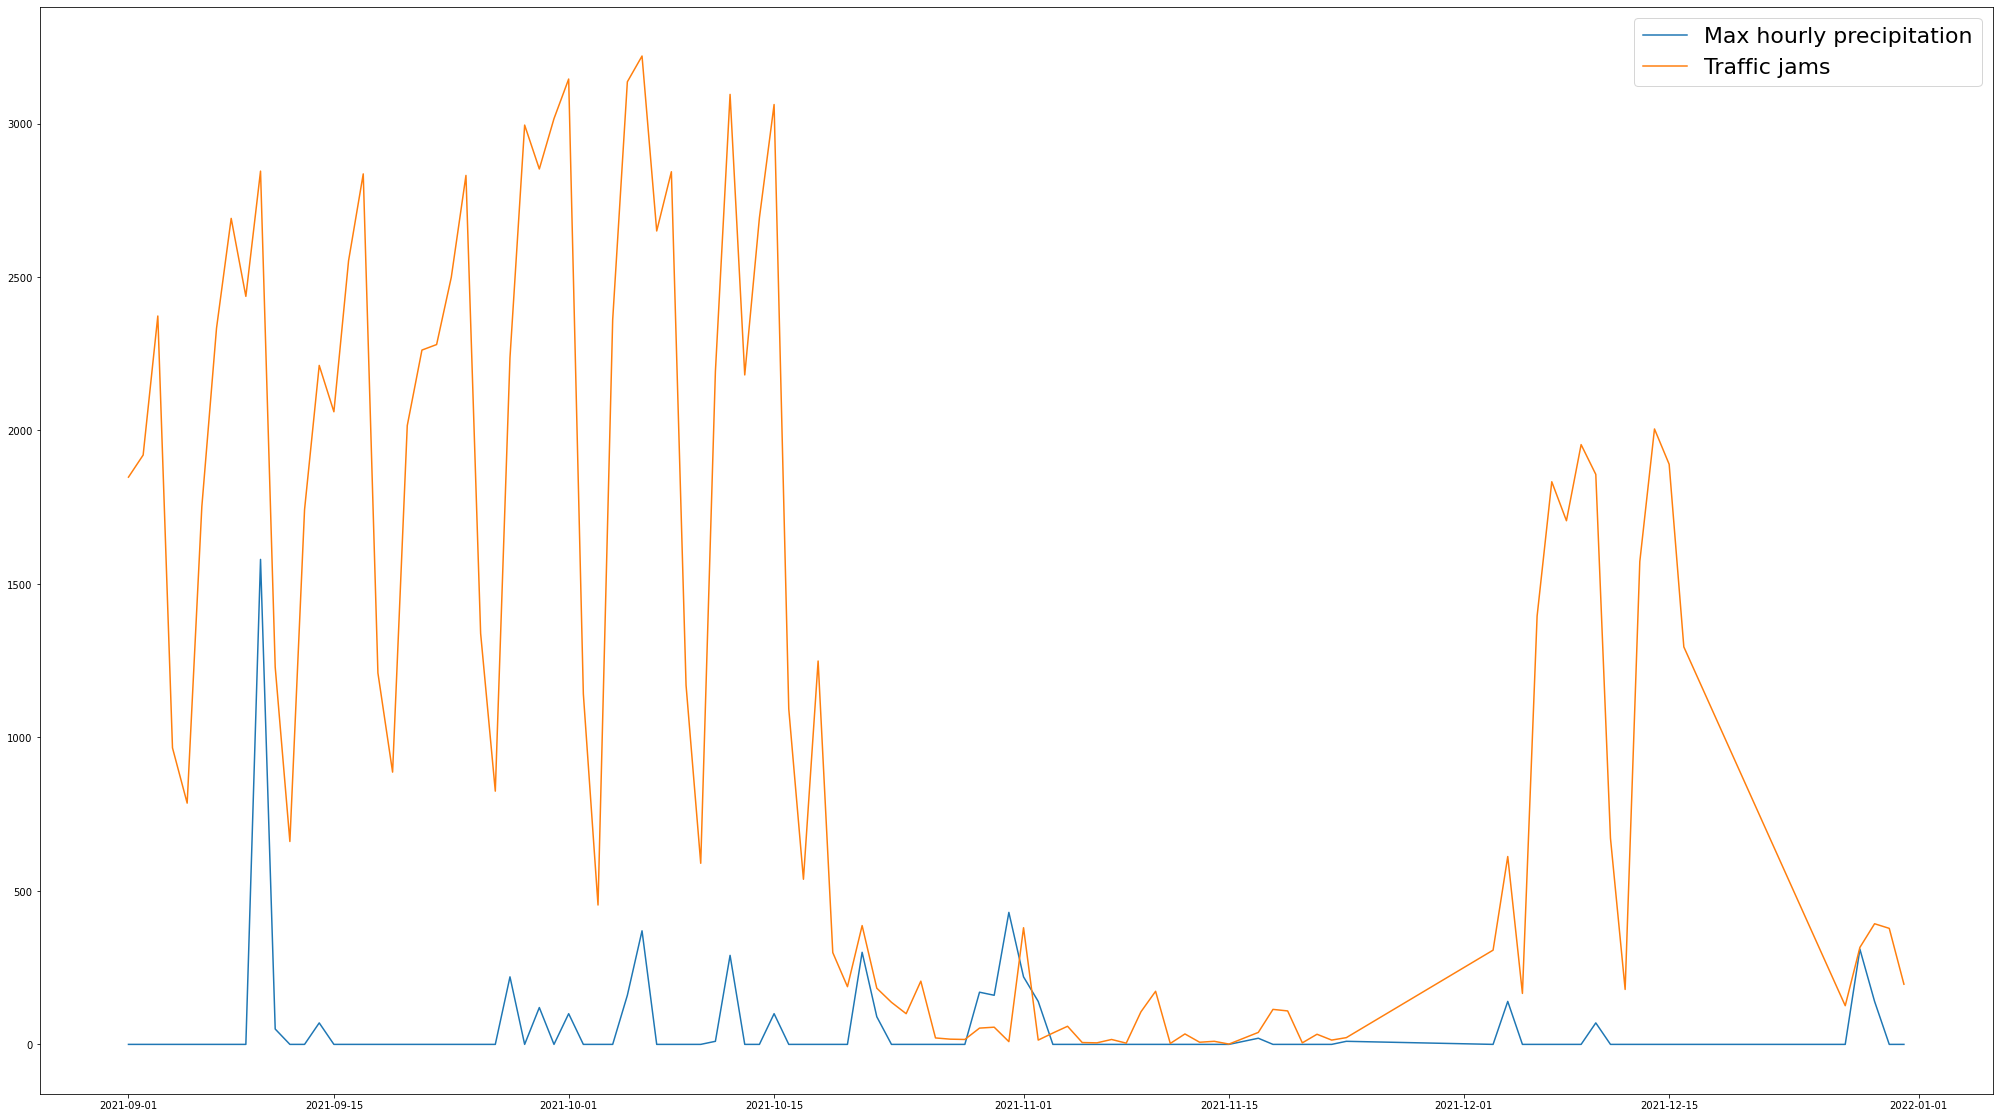

In [45]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=year_2021_sep_dec)
plt.plot( 'Date', 'Traffic jams', data=year_2021_sep_dec)
plt.legend(fontsize=22)
plt.show()

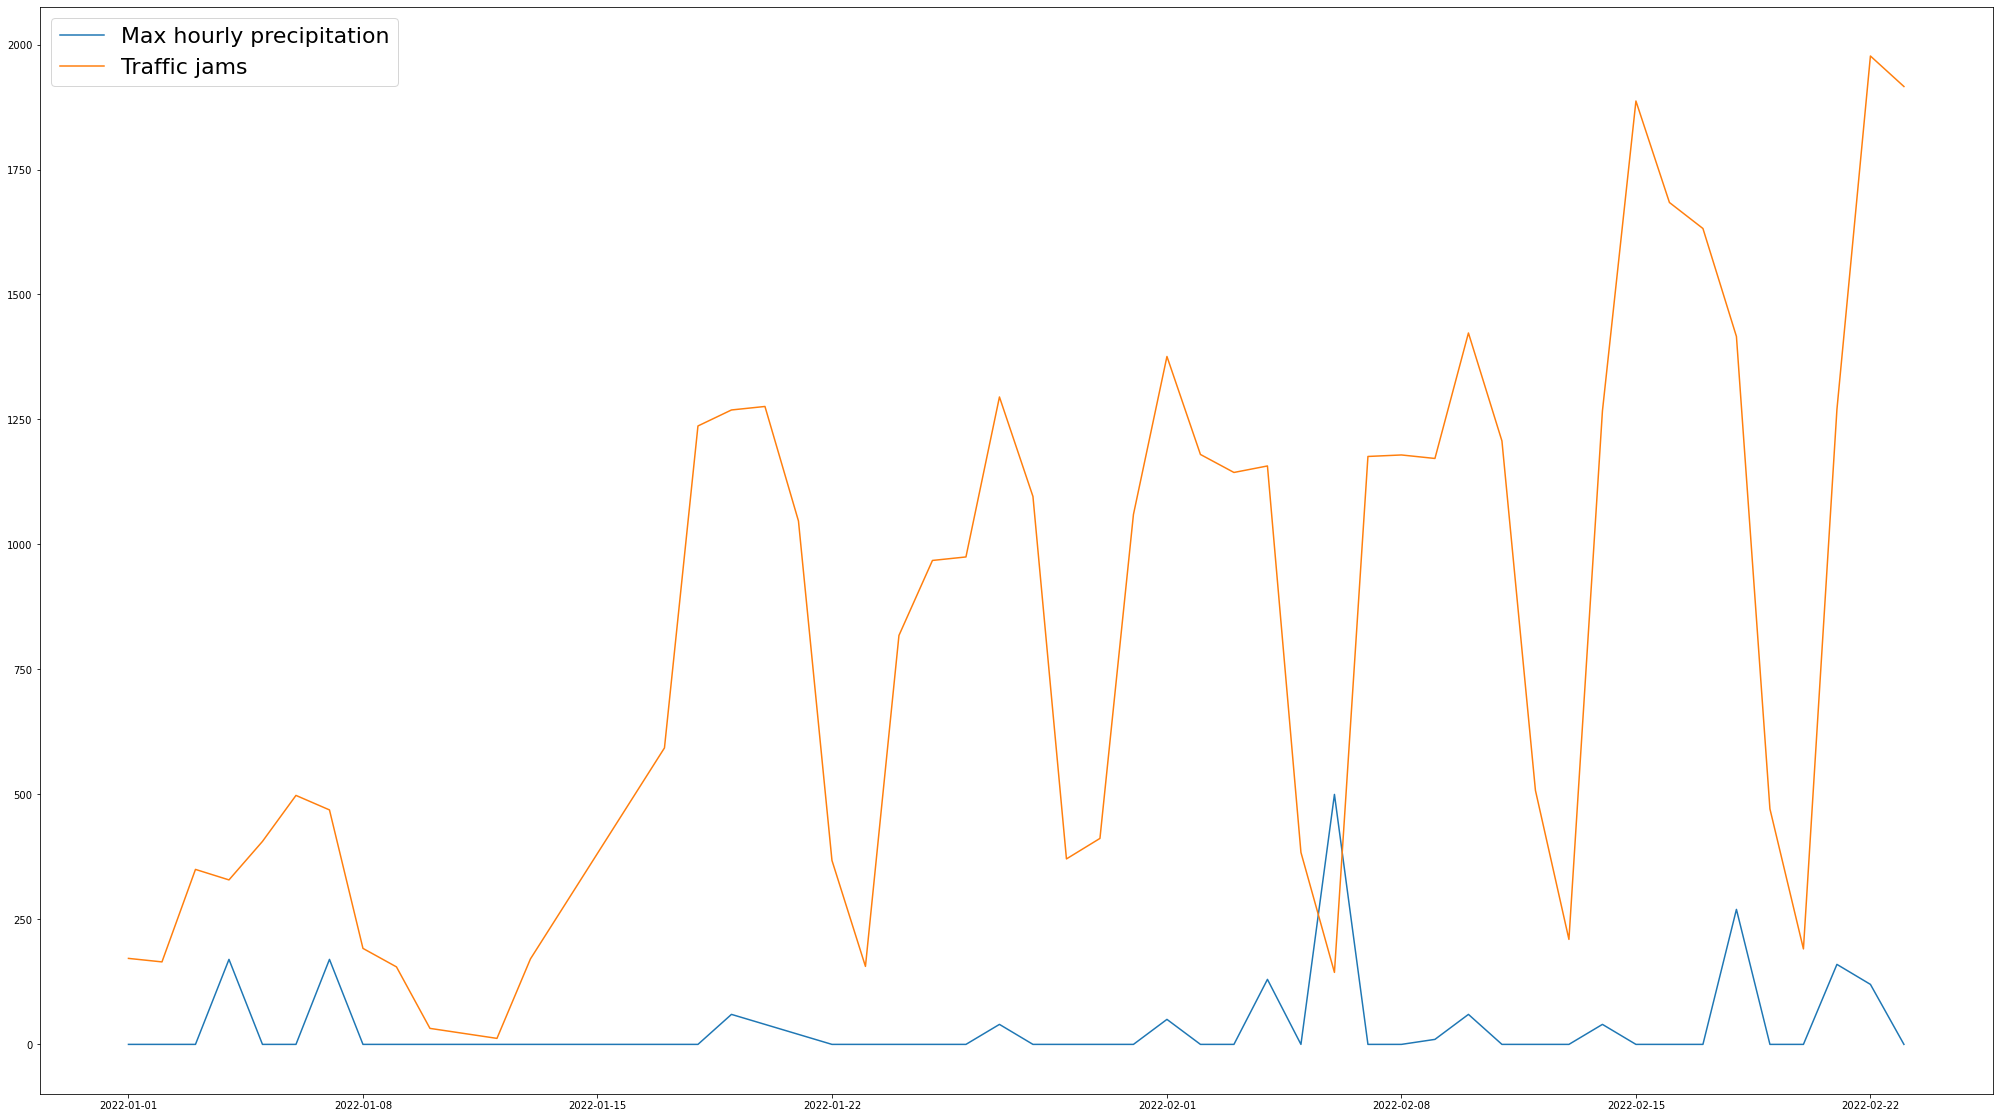

In [46]:
plt.figure(figsize=(35,20))
plt.plot('Date', 'Max hourly precipitation', data=year_2022)
plt.plot( 'Date', 'Traffic jams', data=year_2022)
plt.legend(fontsize=22)
plt.show()

Looking at the graphs we can see that when there is rain on at day, most of the times there is also a peak for traffic jams. This could mean, that rain does affect the traffic and give traffic jams. We should take into consideration that sometimes the traffic jams are very inconsistent because of COVID-19. We can see that from July 2021 the traffic jams get lower, this could be because July 10 2021, more measurements are implemented.

In [47]:
rain_trafficjams = rain_trafficjams.set_index(rain_trafficjams['Date'], drop = False)
rain_trafficjams

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation,Traffic jams
Date,,,,,
2020-07-13,370,2020-07-13,0,1,145
2020-07-14,370,2020-07-14,40,14,396
2020-07-15,370,2020-07-15,0,1,303
2020-07-16,370,2020-07-16,50,11,356
2020-07-17,370,2020-07-17,0,1,722
...,...,...,...,...,...
2022-02-19,370,2022-02-19,0,22,471
2022-02-20,370,2022-02-20,0,22,191
2022-02-21,370,2022-02-21,160,11,1270


Our next step is to make the date the index. Having the date as index is better when modeling, and you can filter better if needed.

In [48]:
rain_trafficjams.index = pd.DatetimeIndex(rain_trafficjams.index).to_period('D')
rain_trafficjams.index

PeriodIndex(['2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
             '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
             '2020-07-21', '2020-07-27',
             ...
             '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
             '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
             '2022-02-22', '2022-02-23'],
            dtype='period[D]', name='Date', length=501)

In [49]:
rain = rain.set_index(rain['Date'], drop = False)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,0,5
2018-01-03,370,2018-01-03,0,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,0,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


In [50]:
rain.index = pd.DatetimeIndex(rain.index).to_period('D')
rain.index

PeriodIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
             '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
             '2018-01-09', '2018-01-10',
             ...
             '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21',
             '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
             '2022-05-26', '2022-05-27'],
            dtype='period[D]', name='Date', length=1608)

We again put the date as index and make the index a datatype period, so it is better to filter when modeling.

## Pre processing

### Algorithm
So the algorithm we’ve chosen to use is the SARIMA algorithm. ARIMA, short for 'AutoRegressive Integrated Moving Average', is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values (Phrabakaran, 2021). But we've used SARIMA, and the S in front of ARIMA stands for seasonal.

We use this algorithm to predict the future and give a corresponding conclusion. This way we can advise on which days to travel a lot on and on which days to not travel on. We’ve kept the scope small for now, so if this algorithm works properly. We’ll be able to use a better dataset and possibly predict the specific hours on each day to travel on. 

### Feature selection
Our dataset is rather short, so we were able to easily select features. The features are STN, YYYYMMDD, RHX and RHXH. These features are explained above in the notebook. 

The feature weather station number (#STN) is rather invaluable to us. We’ve decided to use a small scope in which we only use the weather station in Eindhoven. Since JUGO has many clients in Eindhoven. The data is already manipulated this way before we use the SARIMA algorithm.  The feature of hourly division in which the maximum hourly precipitation (RHXH) is measured is also already manipulated out of the dataset. We only use the working hours we’ve taken from the RHXH values. So the remaining data we’ve selected is already filtered on Eindhoven and working hours only.

The only valuable features for us right now are Date (YYYYMMDD) and  Maximum hourly precipitation (RHX). We’ll have to use the date, because time series forecasting is based on date. And we use maximum hourly precipitation as the value we want to predict. So we can predict the dates on which there will be the most rain. If this works out we can give a conclusion on which days it’s worst to travel in the future for JUGO in Eindhoven. If this goes well we can largen our scope.


### Modeling

In [51]:
import statsmodels
import statsmodels.api as sm
import itertools
import warnings

# Function for fitting model and returning the results object
def FitModel(param, seasonalParam):
    saim = sm.tsa.statespace.SARIMAX(rain[['Max hourly precipitation']],
                                order=param,
                                seasonal_order=seasonalParam,
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                freq='D')

    return saim.fit()

C:\Users\iris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\iris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Importing libraries and defining the model.

In [52]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonalPdq = [(x[0], x[1], x[2], 12) for x in pdq]

results = dict()
# Run through every pdq variant
for param in pdq:
#     Run through every seaonsal PDQ variant aswell
    for seasonalParam in seasonalPdq:
#             Store the results in dict
        results[f"{param}-{seasonalParam}"] = FitModel(param, seasonalParam)

Tuning the hyper parameters

In [53]:
# Set AIC results in dataframe for easy readability
resultsdf = pd.DataFrame(columns=['params', 'AIC'])
for name, result in results.items():
    resultsdf = resultsdf.append({'params': name, 'AIC': result.aic}, ignore_index=True)

resultsdf.sort_values('AIC', ascending=True).head(5)

,params,AIC
47,"(1, 0, 1)-(1, 1, 1, 12)",19902.277257
15,"(0, 0, 1)-(1, 1, 1, 12)",19903.728267
63,"(1, 1, 1)-(1, 1, 1, 12)",19906.885952
43,"(1, 0, 1)-(0, 1, 1, 12)",19910.939015
11,"(0, 0, 1)-(0, 1, 1, 12)",19912.622467


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7350      0.142      5.175      0.000       0.457       1.013
ma.L1         -0.6735      0.157     -4.278      0.000      -0.982      -0.365
ar.S.L12       0.0808      0.010      8.486      0.000       0.062       0.099
ma.S.L12      -1.0000      0.008   -128.638      0.000      -1.015      -0.985
sigma2      1.639e+04   4.75e-07   3.45e+10      0.000    1.64e+04    1.64e+04


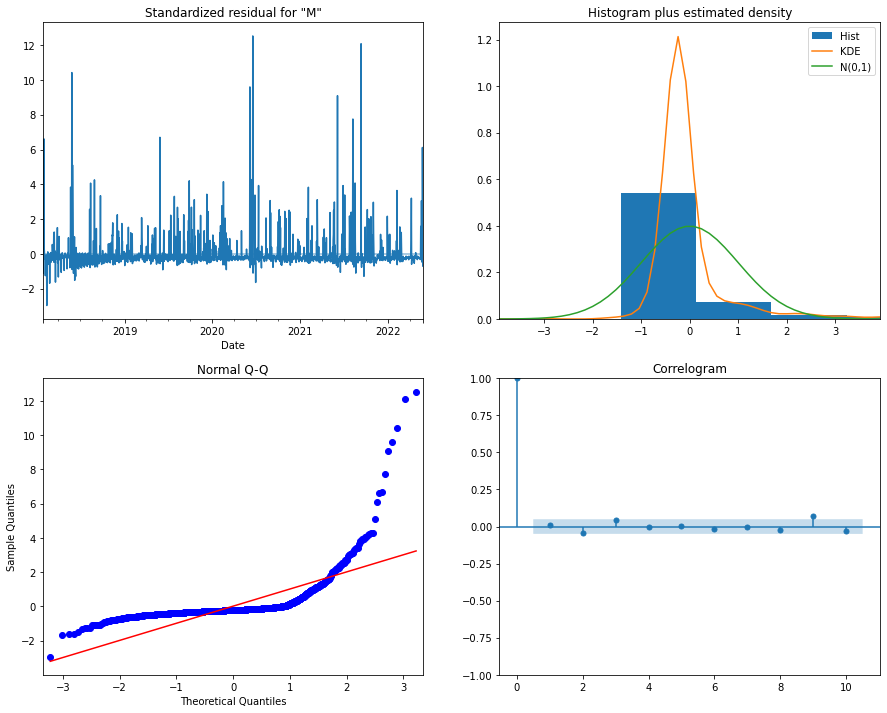

In [54]:
print(results['(1, 0, 1)-(1, 1, 1, 12)'].summary().tables[1])
results['(1, 0, 1)-(1, 1, 1, 12)'].plot_diagnostics(figsize=(15, 12))
plt.show()

Standard residual graph: This graph shows the difference between observed and expected values. This means that there are an incredible amount of missobservations. Which means our prediction will be very innacurate and insecure.

Histogram plus estimated density: The values we have in our dataset are getting compared to the normal standard deviation. This means all data errors are happening in the middle of our dataset.

Normal Q-Q: The blue dots are supposed the normal distribution, you can see that the extreme values are very off from the normal distribution. This means that the prediction is very off in the extreme values. Which is to be expected, since some days have incredible amount of rain and some days have very little amount of rain.

In [55]:
rain[['Max hourly precipitation']].describe()

,Max hourly precipitation
count,1608.000000
mean,39.371891
std,128.426080
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1780.000000


As you can see in the table above the mean is really low, which is 39 millimeters and the standard deviation is very high with 128 millimeters. This means that there is a lot of fluctuation between the data. Everything below 75% of the data is 0, which means that there is no rain in 75% of the days. Which makes it very hard for us to predict the data.

In [56]:
model = results['(1, 1, 1)-(1, 1, 1, 12)']

In [57]:
pred = model.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

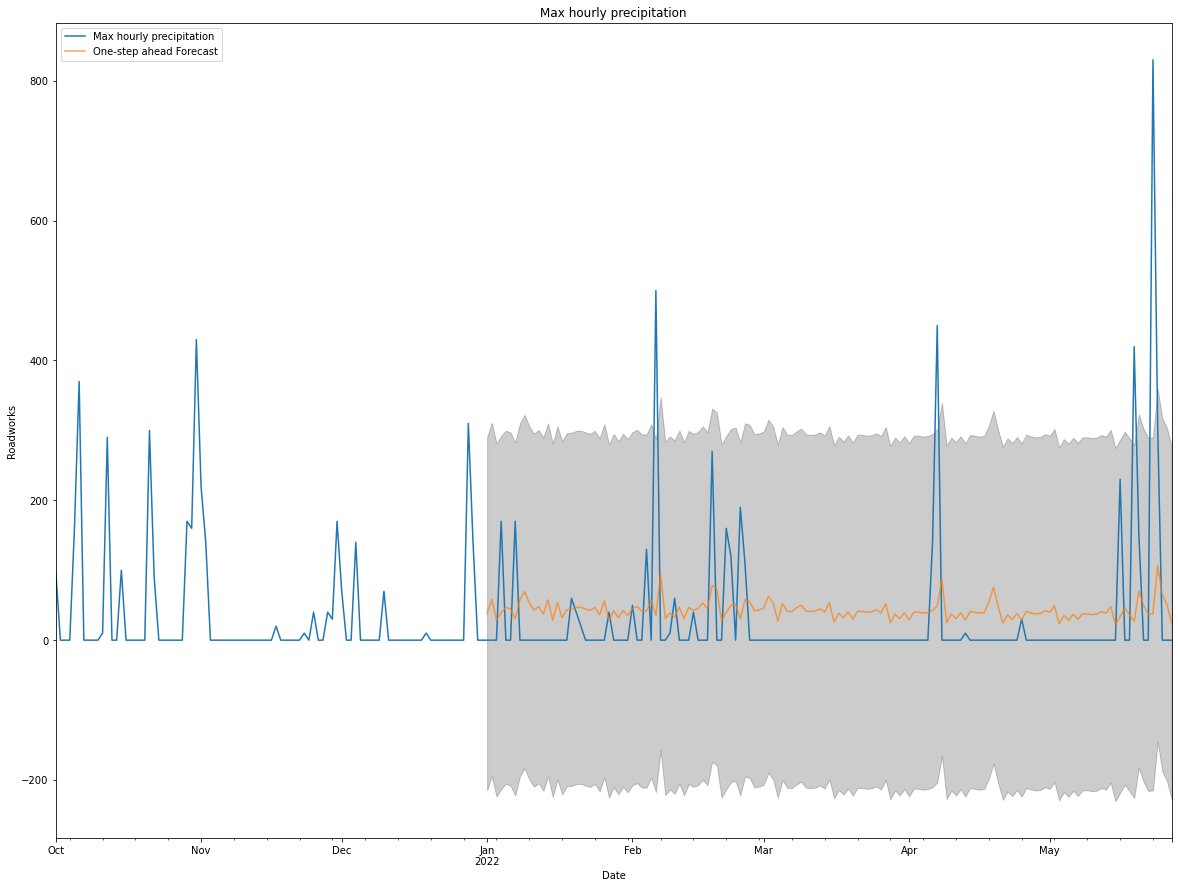

In [58]:
# Show reference data
ax = rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
# Show predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# Show confidence of the model's prediction
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Roadworks')
ax.set_title('Max hourly precipitation')
plt.legend()

plt.show()

When using one step ahead forecasting, it is seen that the model performs extremely poorly. As we've seen in the 4 graphs above, this was to be expected. The model is extremely insecure, it is unable to predict the extreme values. Also because there is many low values in the graph, it fluctuates a lot. Which causes the prediction not to be able to predict these unpredictable spikes and drops.

In [59]:
pred_date = '2022-01-01'
pred_dynamic = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

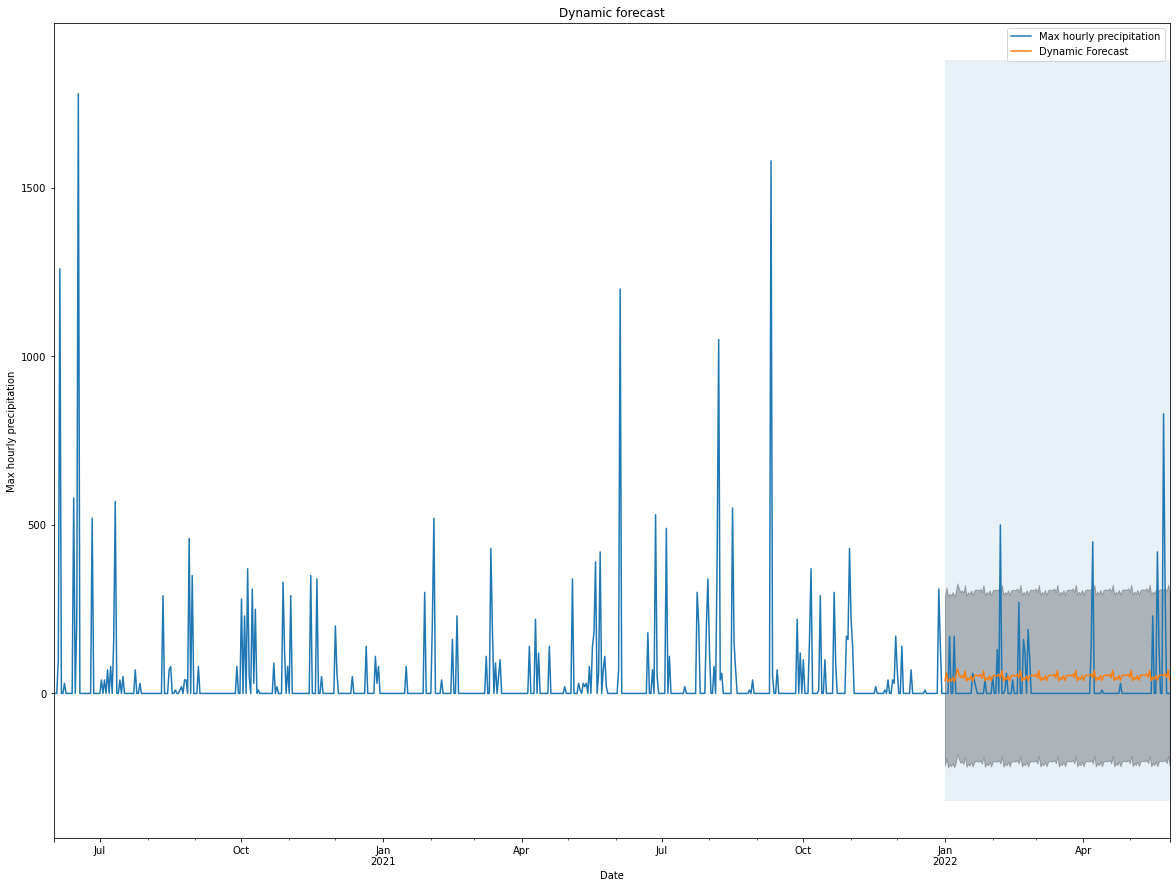

In [60]:
# Show reference data
ax = rain[['Max hourly precipitation']]['2020-6':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), rain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Max hourly precipitation')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()

As you can see in the graph above the model is really insecure and can't predict properly. This is caused by the many low values and the extreme spikes. Which is to be expected, because the data is very unpredictable and has spikes and low days.

#### Using all hours

In [61]:
baserain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,100,5
2018-01-03,370,2018-01-03,370,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,100,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


In [62]:
basesaim = sm.tsa.statespace.SARIMAX(baserain[['Max hourly precipitation']],
                                order=(1,0,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
basemodel = basesaim.fit()

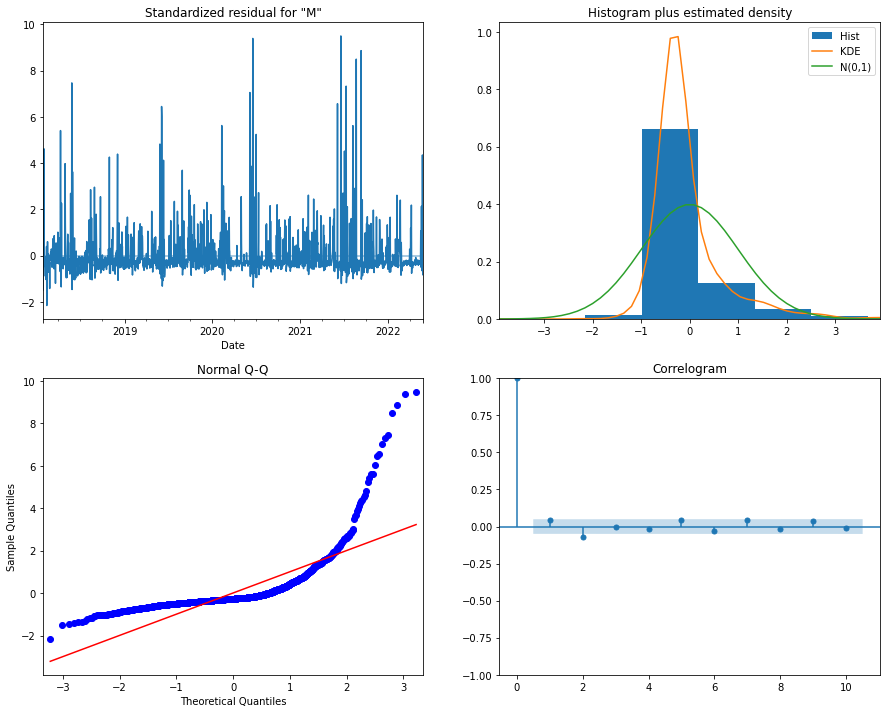

In [63]:
basemodel.plot_diagnostics(figsize=(15, 12))
plt.show()

In [64]:
pred_date = '2022-01-01'
pred_dynamic = basemodel.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

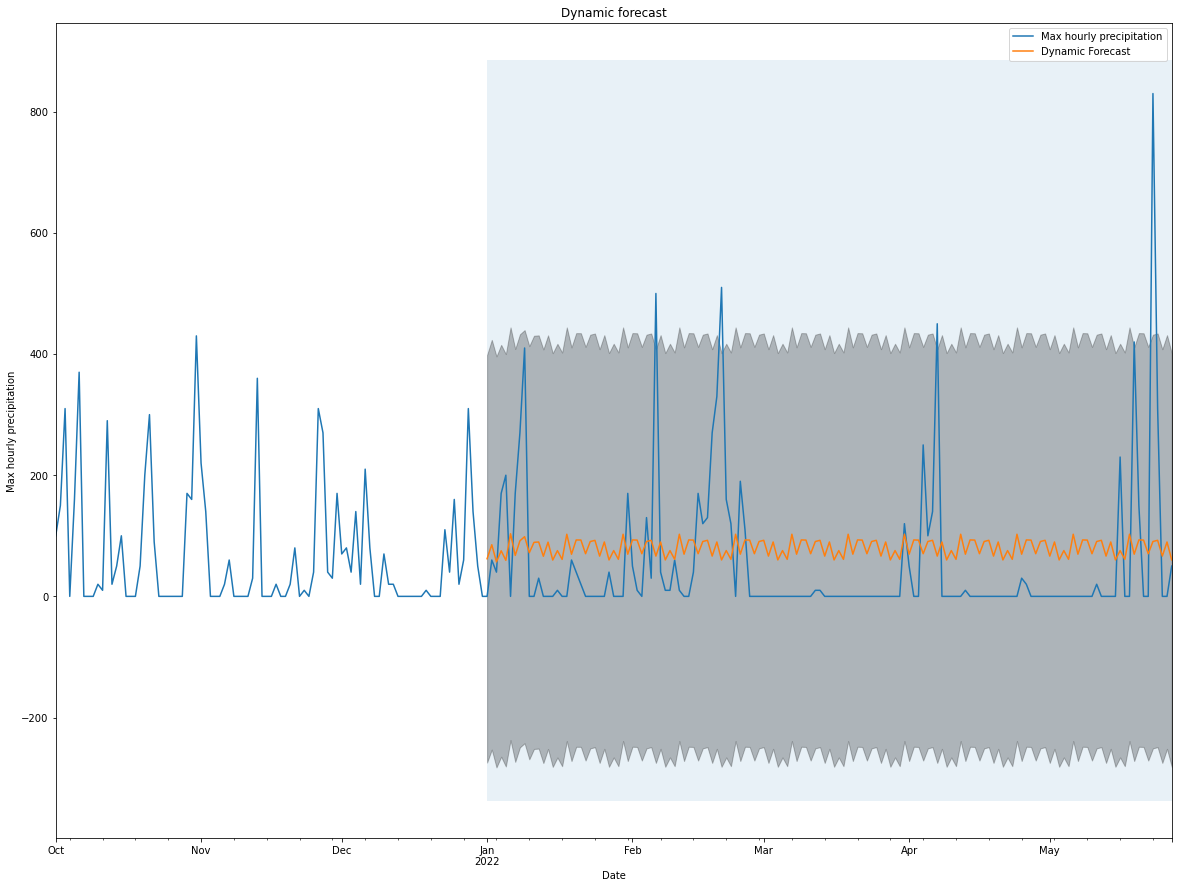

In [65]:
# Show reference data
ax = baserain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), baserain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Max hourly precipitation')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()

Even with all the data, the prediction is really insecure and not accurate at all. Which means, we either need more consistent data or more datapoints in general to generate a prediction. I think the cause of the predication being this bad is because of the many spikes and the many low values.

### Evaluation

In this section we’ll evaluate the scores we got from the SARIMA models. 

There are a lot of spikes in the standardized residual for “M” which go from 1 all the way up to 10. This means that the forecast will be of by that value in the graph times the standard deviation. The smaller this is the better it would be for our prediction, which is not the case.
The points all the way up to 10, caught my eye since on some days there’s insane amounts of precipitation, which the forecast can’t predict. These points are easily seen in the Standarized residual for “M”. So the forecast has a lot of spikes in the prediction, which is to be expected because the data is very inconsistent to make a prediction. There are way too many spikes and way too may 0 values in a row.

In the histogram plus estimated density graph we can see that our data has a normal distribution. But unfortunately it has no standard normal distribution. There are a lot of points in -1, this means that the data is far of from the predicted rain.

In the normal Q-Q graph we can see that our data is not on the red line at almost every point. Which means that the forecast only has wrong predictions, since the blue dots are never on the red line. This is caused by the spikes and a lot of 0 values in the data.

The correlogram gives the correlation between consecutive days. As you can see we have no correlation here. This means that the data is unpredictable based on the time beforehand. This is to be expected since the data is very unpredictable and either spikes or sits on 0.
